<a href="https://colab.research.google.com/github/ARAVINDDHAKSHAN/Machine-Learning/blob/master/ML_PROJECT_(Building_Model_for_Bank_Loan_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROBLEM STATEMENT**

### **Context:**

This case is about a Bank whose management wants to explore ways of coverting it's liability customers to personal loan customers while retaining them as depositors. A campaign that the bank ran last year for liability customers showed a healthy conversion rate over 9.6% success.The department requires a model that will help them identifying potential customers with high probability of purchasing personal loans.

### **Objective:**

The classification goal is to predict the likelihood of a liability customer buying personal loans.

# **HYPOTHESIS GENERATION**

This is very important stage in any machine learning pipeline. It involves brainstorming as many factors as possible which can impact the outcome. It is done by understanding the problem statement thoroughly before looking at the data.

### **Salary**:
A major dependent variable as customers with high salaries are less likely to buy personal loans when compared to those with medium or low salaries. 

### **Family members:**
More the number of earning family members, less probability of buying personal loans.

### **Age:**
Customers with age of 30-50 will buy personal loans.

### **Education:**
Whether the customer is graduate or undergraduate can affect buying probability, i.e. people who are advanced professionals are more viable to buy personal loans from a bank than undergraduates.

### **ZIP Code**:
More number of customers from same area will increase probability of buying personal loans.

# **(1) Starting with importing basic libraries, reading the data into data frame and figuring out the basic shape of Data set.**

In [97]:
# IMPORTING STANDARD LIBRARIES

import pandas as pd
import numpy as np                  # mathematical calculations
import seaborn as sns               # data visualization
import matplotlib.pyplot as plt     # plotting graphs
%matplotlib inline                   
import warnings                     # Ignore warnings
warnings.filterwarnings("ignore")  

In [98]:
# READING THE DATA 

df=pd.read_excel("Bank_Personal_Loan_Modelling.xlsx")

In [99]:
# DISPLAYING TOP ROWS

df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [100]:
# DISPLAYING BOTTOM ROWS

df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [101]:
# NAMES OF VARIABLE & SHAPE OF DATASET

print(df.columns)
print(df.shape)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')
(5000, 14)


There are 13 independent variables and 1 dependent variable i.e. 'Personal Loan' in the dataset having 5000 rows that can be split into Train dataset & Test dataset.

## **DESCRIPTION OF VARIABLES**

**ID**:  Customer identification

**Age**: Customer’s age in completed years

**Income:** Annual income of customer

**ZIP Code**: Customer Home Address

**Family**: Family size of customer

**CCAvg**:  Average spending on credit cards 
per month

**Education**: Undergraduate / Graduate / Advanced professional

**Mortgage**: Value of house (if any)

**Securities Account**: If customer has securities account with the bank

**CD Account**: Customer certificate of deposit with the bank

**Online**: If customer use online banking facilities

**Credit Card**: If Customer use credit card issued by Universal Bank

**Personal Loan**: If customer had accepted personal loan offered in last campaign


In [102]:
# 1.2 CHECKING TYPES OF DATA & SUMMARY STATS 

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# **(2) CLEANING DATA OF ANY UNNECESSARY VARIABLES**

In [103]:
E=df['Experience']
A=df['Age']
correlation=E.corr(A)
correlation

0.9942148569683321

In [104]:
# DROPPING HIGHLY CORRELATED COLUMNS
 
df.drop('ID', axis=1,inplace=True)
df.drop('Experience',axis=1,inplace=True)

In [105]:
df.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


In [106]:
duplicate_rows_df=df[df.duplicated()]
print("No. of Duplicate Rows",duplicate_rows_df)

No. of Duplicate Rows Empty DataFrame
Columns: [Age, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []


# **(3) EXPLORATORY DATA ANALYSIS**

### **(3.1) NUMBER OF UNIQUE IN EACH COLUMNS**
          
          i.e How many places Bank has it's Customers 
          


In [107]:
df.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

### **(3.2) NUMBER OF PEOPLE WITH ZERO MORTGAGES**

In [108]:
 df[df['Mortgage']==0] ['Mortgage'].count()

3462

### **(3.3) NUMBER OF PEOPLE WITH ZERO Credit Card SPRENDING PER MONTH**


In [109]:
df[df['CCAvg']==0] ['CCAvg'].count() 

106

### **(3.4) VALUE COUNTS OF ALL CATEGORICAL COLUMNS**

In [110]:
df.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [111]:
df.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [112]:
df['CreditCard'].value_counts()


0    3530
1    1470
Name: CreditCard, dtype: int64

In [113]:
df['CD Account'].value_counts()


0    4698
1     302
Name: CD Account, dtype: int64

In [114]:
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Income              5000 non-null   int64  
 2   ZIP Code            5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


## **(3.5) UNIVARIATE AND BIVARIATE ANALYSIS**

In [116]:
!pip install -U pandas-profiling

Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.8.0)


In [117]:
# UNIVARIATE ANALYSIS USING PANDAS PROFILING

import pandas_profiling
df.profile_report()

### **POINTS OBSERVED FROM PROFILE REPORT IN UNIVARIATE ANALYSIS**


*   The dataset has 0 Missing cells.

*   The dataset has 0 Duplicate rows.

*   The dataset has total 12 Variables.

*   CCAvg has 106 (2.1%) zero counts.

*   Mortgage has 3462 (69.2%) zero counts.

*   It has 5 Numeric variables-'Age', 'CCAvg', 'Income', 'Mortgage', 'ZIP Code'.

*   It has 2 Categorical columns -'Education', 'family'.

*   It has 5 Boolean Variables-'CD Account', 'Credit Card', 'Online', 'Personal Loan', 'Securities Account'  


### **Categorical**:


*   42% of candidates are graduated, while 30% are professional and 28% are Undergraduate.

*   Around 29% of customer's family size is 1.

## **Boolean:**


*   94% of customers doesn't have a certificate of deposit account (CD) with the bank.


*   Around 71% of customers don't use Credit Card.


*   Around 60% of customers use internet banking facilities.

*   Around 90% of customers doesn't accept personal loan offered in the last campaign.
*   Around 90% of customers doesn't have Securities Account with bank.

## **Numeric:**

*   The mean age of customers is 45 with standard deviation of 11.5. Also, estimated average age in hypothesis testing was between 30-50. The curve is slightly negatively skewed (Skewness = -0.02934068151) hence the curve is fairly symmetrical.

*   The mean of Average spending on Credit Cards per month is 1.93 with Standard deviation of 1.75. The curve is highly positive skewed (Skewness = 1.598443337).

*   The mean annual income of customer is 73.77 with standard deviation 46. The curve is moderately positive skewed (Skewness = 0.8413386073).
*   The mean value of house Mortgage is 56.5 with standard deviation of 101.71. The curve is highly positive skewed (Skewness = 2.1040023) and there are lot of outlier's present(Kurtosis = 4.756796669)


# **BIVARIATE ANALYSIS**

Recalling our hypothesis that was generated earlier.


*   High salaries are less feasible to buy personal loans while customers with medium or low salaries are more feasible for buying personal loans.

*   More the number of earning family members, less probability of buying personal loans
*   Customers with age of 30-50will buy personal loans.


*   If a customer is graguate/undergraduate can affect the buying probability, people who are graduated or Advanced Professionals are more viable to buy personal loans from a bank rather than people who are undergraduates.

*   More the number of customers from same area higher the probability of buying personal loan.

            Testing the above-hypothesis using Bivariate Analysis.

### **CATEGORICAL INDEPENDENT VARIABLE VS TARGET VARIABLE**

cross tabulation can be given as : 
 Personal Loan     0    1
Education               
1              2003   93
2              1221  182
3              1296  205
cross tabulation in percentage can be given as : 
 Personal Loan         0         1
Education                        
1              0.955630  0.044370
2              0.870278  0.129722
3              0.863424  0.136576


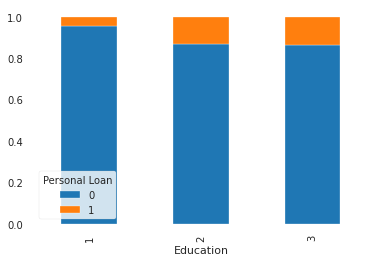

In [118]:
edu=pd.crosstab(df['Education'],df['Personal Loan'])
edu.div(edu.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as :','\n',edu)
print('cross tabulation in percentage can be given as :','\n',edu.div(edu.sum(1).astype(float),axis=0))


From above plot we can infer that customers who are more educated have higher probability of buying personal loans.
Hence, our hypothesis was true.

cross tabulation can be given as : 
 Personal Loan     0    1
Family                  
1              1365  107
2              1190  106
3               877  133
4              1088  134
cross tabulation in percentage can be given as : 
 Personal Loan         0         1
Family                           
1              0.927310  0.072690
2              0.918210  0.081790
3              0.868317  0.131683
4              0.890344  0.109656


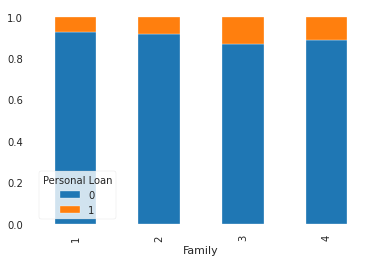

In [119]:
family=pd.crosstab(df['Family'],df['Personal Loan'])
family.div(family.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as :','\n',family)
print('cross tabulation in percentage can be given as :','\n',family.div(family.sum(1).astype(float),axis=0))


From the graph we can infer that, the number of family members not significantly affect probability. Hence it contradicts our hypothesis that number of family members affects probability.

### **BOOLEAN INDEPENDENT VARIABLE VS TARGET VARIABLE**

cross tabulation can be given as : 
 Personal Loan     0    1
CD Account              
0              4358  340
1               162  140
cross tabulation in percentage can be given as : 
 Personal Loan         0         1
CD Account                       
0              0.927629  0.072371
1              0.536424  0.463576


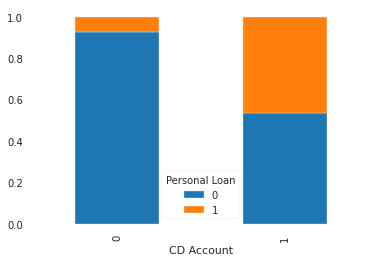

In [120]:
cd=pd.crosstab(df['CD Account'],df['Personal Loan'])
cd.div(cd.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as :','\n',cd)
print('cross tabulation in percentage can be given as :','\n',cd.div(cd.sum(1).astype(float),axis=0))


From the graph it can be inferred that, customers having certificate of deposit account seems to buy personal loans from the bank. 

cross tabulation can be given as : 
 Personal Loan     0    1
CreditCard              
0              3193  337
1              1327  143
cross tabulation in percentage can be given as : 
 Personal Loan         0         1
CreditCard                       
0              0.904533  0.095467
1              0.902721  0.097279


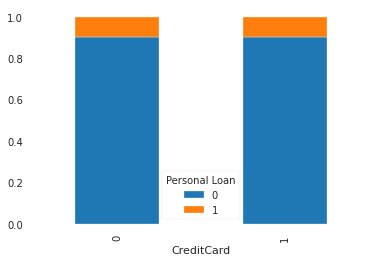

In [121]:
credit=pd.crosstab(df['CreditCard'],df['Personal Loan'])
credit.div(credit.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as :','\n',credit)
print('cross tabulation in percentage can be given as :','\n',credit.div(credit.sum(1).astype(float),axis=0))


From the graph we can infer that, whether customers use credit card or not, doesn't affect the probability of buying a personal loan.

cross tabulation can be given as : 
 Personal Loan     0    1
Online                  
0              1827  189
1              2693  291
cross tabulation in percentage can be given as : 
 Personal Loan        0        1
Online                         
0              0.90625  0.09375
1              0.90248  0.09752


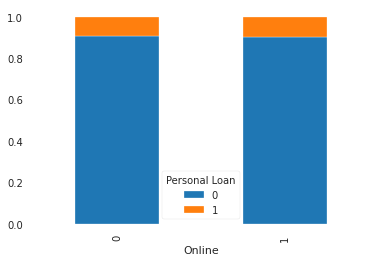

In [122]:
online=pd.crosstab(df['Online'],df['Personal Loan'])
online.div(online.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as :','\n',online)
print('cross tabulation in percentage can be given as :','\n',online.div(online.sum(1).astype(float),axis=0))


From the graph we can infer that, whether customers use internet banking facilities or not doesn't affect the probability of buying personal loans.

cross tabulation can be given as : 
 Personal Loan          0    1
Securities Account           
0                   4058  420
1                    462   60
cross tabulation in percentage can be given as : 
 Personal Loan              0         1
Securities Account                    
0                   0.906208  0.093792
1                   0.885057  0.114943


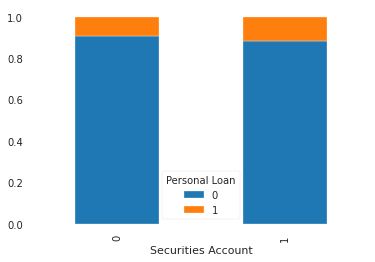

In [123]:
sec=pd.crosstab(df['Securities Account'],df['Personal Loan'])
sec.div(sec.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as :','\n',sec)
print('cross tabulation in percentage can be given as :','\n',sec.div(sec.sum(1).astype(float),axis=0))


From the graph we can infer that, customers having securities account or not, doesn't affect the probability of buying personal loans.

### **NUMERICAL INDEPENDENT VARIABLE VS TARGET VARIABLE**

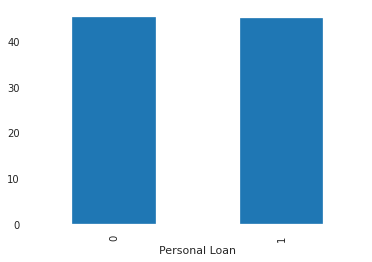

In [124]:
df.groupby('Personal Loan')['Age'].mean().plot(kind='bar')

Here, y-axis represents the mean applicant age. There isn't any change in the mean age.so, making bins for the applicant age variable based on the values in it and analyze corresponding loan status for each bin.

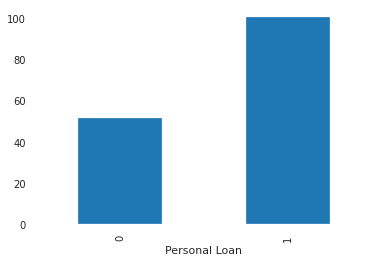

In [125]:
df.groupby('Personal Loan')['Mortgage'].mean().plot(kind='bar')

Here, y-axis represents mortgages of customers. It can be clearly seen that customers with mortgages are likely to buy personal loans.

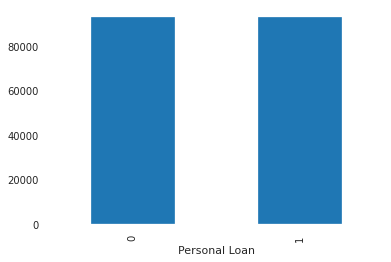

In [126]:
df.groupby('Personal Loan')['ZIP Code'].mean().plot(kind='bar')

From the graph we can infer that, number customers coming from same area doesn't affect the probability of buying Personal Loans. Hence it contradicts our hypothesis.

In [127]:
# DROPPING UNNECESSARY COLUMN

df.drop('ZIP Code',axis=1, inplace=True)

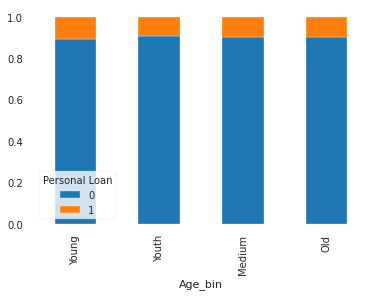

In [128]:
# CREATING BINS

bins=[23,35,45,55,67]
group=['Young','Youth','Medium','Old']
df['Age_bin']=pd.cut(df['Age'],bins,labels=group)   # Converting numeric to categorical variable
age=pd.crosstab(df['Age_bin'],df['Personal Loan'])
age.div(age.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

It can be inferred that, the Applicant age doesn't affect the chances of buying personal loan which contradicts our hypothesis in which we assumed that applicant age is a major factor for buying personal loan.

In [129]:
df.drop('Age_bin',axis=1,inplace=True)

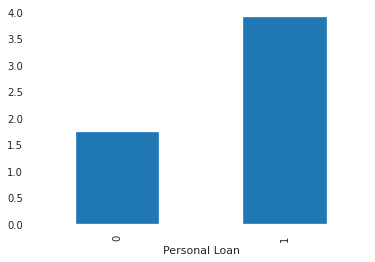

In [130]:
# AVERAGE SPENDING OF PERSONAL LOAN BUYER'S ON CREDIT CARDS PER MONTH

df.groupby('Personal Loan')["CCAvg"].mean().plot(kind='bar')

Here, the y-axis represents the mean applicant spending on credit cards per month. It can be clearly seen that applicants who spend more on credit cards are more viable to buy personal loans.

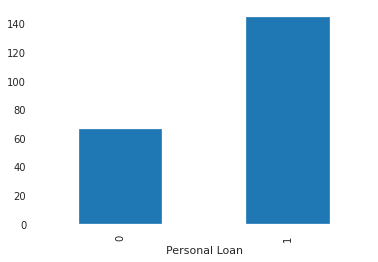

In [131]:
# HOW INCOME OF CUSTOMETER AFFECTS 
df.groupby('Personal Loan')['Income'].mean().plot(kind='bar')

Here, y-axis represents the mean annual income of customers. It can be clearly seen that customers with high income are more feasible to buy personal loans which contradicts our hypothesis that high salaries are less feasible to buy personal loans.

**CHECKING FOR ANY MISSING VALUES**

In [132]:
df.isnull().sum()


Age                   0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# **(4) APPLYING NECESSARY TRANSFORMATIONS**

*   Since, the dataset has many outliers which can be seen in Univariate Analysis with the help of Kurtosis. Outliers has significant effect on the mean and standard deviation hence, affecting the distribution.

*   Due to these Outliers bulk of the data in the Mortgage is at the left and the right tail is longer. This is called Right Skewness. This can be removed by doing Z-score test.


In [133]:
# REMOVING RIGHT SKEWNESS USING Z-SCORE  (Z=(x-MEAN)/S)

from scipy import stats
df['Mortgage_zscore']=np.abs(stats.zscore(df['Mortgage']))
df=df[df['Mortgage_zscore']<3]
df.drop('Mortgage_zscore',axis=1,inplace=True)

Choosing rows only with Z-Score less than 3 and dropping more than 100 rows which contain Outliers for further model building.

In [134]:
x=df.drop('Personal Loan',axis=1)            # set of Independent variable
y=df['Personal Loan'].values                 # set of Dependent Variable
np.unique(y)

array([0, 1])

# (5) **NORMALISING AND SPLITTING DATA**

In [135]:
from sklearn.model_selection import train_test_split  #importing library for splitting the data 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [136]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(3426, 10) (1469, 10) (3426,) (1469,)


# **(6)   MODEL BUILDING: LOGISTIC REGRESSION CLASSIFIER**

*   Logistic Regression is a Classification algorithm. It is used to predict binary outcome (1/0, True/False) for a given set of independent variables.

*   It is an estimation of Logit function which is simply a log of odds in favor of the event.

*   This function creates an S-shaped curve with the probability estimate, which is similar to Stepwise function.

In [137]:
# USING SCIKIT-LEARN FOR MAKING DIFFERENT MODELS

from sklearn.linear_model import LogisticRegression   #importing model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc

In [138]:
np.unique(y)

array([0, 1])

In [139]:
LogReg_model=LogisticRegression()   # (assigning LogReg name)
LogReg_model.fit(x_train,y_train)   # fitting the model into training dataset

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# **(7) PRINTING REQUIRED METRICES FOR OBSERVING MODEL PERFORMANCE**

In [140]:
y_pred=LogReg_model.predict(x_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred)) 
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1324
           1       0.77      0.52      0.62       145

    accuracy                           0.94      1469
   macro avg       0.86      0.75      0.79      1469
weighted avg       0.93      0.94      0.93      1469

0.9373723621511232
[[1302   22]
 [  70   75]]


### **INFERENCE:**
This classification report consists of Precision, Recall, f1-Score, Accuracy and 2*2 Confusion Matrix.
Focusing on the Confusion matrix and looking for False Negatives which in this case is 70, i.e. less the number of false negatives, wiser our model and we can directly look upon the Recall for '1' which in this case is 52%. Which means out of total number of customers who actually bought Personal Loans, the model is able to pick 52% of customers to be correctly predicted

In [141]:
# DETERMINING HOW GOOD THE MODEL PERFORMS

Log_Reg_prob=LogReg_model.predict_proba(x_test)
fpr2,tpr2,thresholds2=roc_curve(y_test,Log_Reg_prob[:,1])
roc_auc2=auc(fpr2,tpr2)

print("Area under the ROC curve : %f" % roc_auc2)

Area under the ROC curve : 0.947958


94% Accuracy, 95% Area under curve with 52% Recall value.


In [142]:
# STANDARDIZATION  (Z(scale)= X-U/S) FOR ACCURATE RESULTS

# Estimated weights will update similarly than at different rates during build 
# process since the data has different scale units.

from sklearn import preprocessing               #Importing Library

col_names=df.columns                            # Get column names first
scaler=preprocessing.StandardScaler()           # Create the Scaler Object
scaled_x_train=scaler.fit_transform(x_train)    # Fit data on Scaler object
scaled_x_test=scaler.fit_transform(x_test)


In [143]:
LogReg_model=LogisticRegression()
LogReg_model.fit(scaled_x_train,y_train) # Fitting model into training dataset

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [144]:
y_pred=LogReg_model.predict(scaled_x_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred)) 
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1324
           1       0.84      0.59      0.70       145

    accuracy                           0.95      1469
   macro avg       0.90      0.79      0.83      1469
weighted avg       0.95      0.95      0.94      1469

0.9489448604492853
[[1308   16]
 [  59   86]]


In [145]:
Log_Reg_prob=LogReg_model.predict_proba(x_test)
fpr2,tpr2,thresholds2=roc_curve(y_test,Log_Reg_prob[:,1])
roc_auc2=auc(fpr2,tpr2)

print("Area under the ROC curve : %f" % roc_auc2)

Area under the ROC curve : 0.516994


95% Accrucy . Difference between evaluation metrices with standardization of data can be seen. Accuracy alone can't define the model that how well it predicted. Therefore, recall also need to considered.
In this evaluation there is 59% Recall value, which means the model did much better in predicting true Positives.
Therefore, further analyzing other models with only scaled data.


#(8) **BUILDING VARIOUS CLASSIFICATION ALGORITHMS**

### **NAIVE BAYES CLASSIFIER**

*   It uses the conditional probability of an event (Mutually Exclusive Events).

*   Bayes Theorem assumes predictors or input features are independent of each other.

*   Bayesian probability relates to the degree of belief. It gives likelihood of an event to occur. It does this with prior knowledge of the condition related to the event.



In [146]:
# NAIVES BAYES

from sklearn.naive_bayes import GaussianNB

naives_model=GaussianNB()
naives_model.fit(scaled_x_train,y_train)
y_pred=naives_model.predict(scaled_x_test)

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred)) 
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1324
           1       0.45      0.52      0.48       145

    accuracy                           0.89      1469
   macro avg       0.70      0.73      0.71      1469
weighted avg       0.90      0.89      0.89      1469

0.8897208985704561
[[1231   93]
 [  69   76]]


In [147]:
naive_prob=naives_model.predict_proba(scaled_x_test)
fpr3,tpr3,threshold3=roc_curve(y_test,naive_prob[:,1])
roc_auc3=auc(fpr3,tpr3)

print("Area under the ROC curve : %f" % roc_auc3)

Area under the ROC curve : 0.927795


Accuracy around 89% with Area under the curve 92.7% which is very less compared to Logistic regression.
Hence, Naive Bayes turns out to be not a good classifier with this particular dataset.

### **KNN NEAREST NEIGHBOR CLASSIFIER**

It is very easy to understand and interpret and many times it's accuracy is comparable or even better than other, more complicated algorithms.

KNN is a supervised algorithm, it is non-parametric i.e. it does not explicitly learn the model,but saves all the training data and uses the whole training set for classification or prediction. This contrasts with other techniques like SVM, where we can discard all non-support vectors without any issues.

The training process is very fast and saves all values from the dataset. But consumes huge memory and there is time complexity at testing time.

In [148]:
# KNN (Supervised Algorithm)
# Important Parameters are n_neighbors, weights, algorithm, metric(Euclidean)

from sklearn.neighbors import KNeighborsClassifier

KNN_model=GaussianNB()
KNN_model.fit(scaled_x_train,y_train)
y_pred=KNN_model.predict(scaled_x_test)

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred)) 
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1324
           1       0.45      0.52      0.48       145

    accuracy                           0.89      1469
   macro avg       0.70      0.73      0.71      1469
weighted avg       0.90      0.89      0.89      1469

0.8897208985704561
[[1231   93]
 [  69   76]]


In [149]:
KNN_prob=naives_model.predict_proba(scaled_x_test)
fpr4,tpr4,threshold4=roc_curve(y_test,KNN_prob[:,1])
roc_auc4=auc(fpr4,tpr4)

print("Area under the ROC curve : %f" % roc_auc4)

Area under the ROC curve : 0.927795


89% Accuracy in determining if a customer will buy the personal loan or not with 52% Recall value. which is similar to Naive bayes classifier but bad results when compared to the logistic regression.

### **SVM CLASSIFIER**

A Support Vector Machine is a discriminative classifier formally defined by a separating hyperplane. Given, labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In 2-D space, this hyperplane is a line dividing a plane into two parts wherein each class lay on either side.

In [150]:
# SEEING IF SVM CAN CLASSIFY BETWEEN A BUYER AND A NON-BUYER

from sklearn import svm

clf=svm.SVC(C=3,kernel='rbf',probability=True)
clf.fit(scaled_x_train,y_train)
y_pred=clf.predict(scaled_x_test)

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred)) 
print(confusion_matrix(y_test,y_pred))



              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1324
           1       0.92      0.77      0.83       145

    accuracy                           0.97      1469
   macro avg       0.95      0.88      0.91      1469
weighted avg       0.97      0.97      0.97      1469

0.9700476514635806
[[1314   10]
 [  34  111]]


In [151]:
svm_prob=clf.predict_proba(scaled_x_test)
fpr5,tpr5,threshold5=roc_curve(y_test,svm_prob[:,1])
roc_auc5=auc(fpr5,tpr5)

print("Area under the ROC curve : " ,roc_auc5)

Area under the ROC curve :  0.9830086467340348


97% Accuracy Score with 77% Recall value, and Area under the curve is about 98.3%
So, SVM can be deployed to predict the liklihood of a liability customer buying Personal Loans but further analysis is necessary to see if Trees can predict better or not.

### **DECISION TREES CLASSIFIER**

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

Analysing if the Decision Tree with Criterion as 'Entropy' can nail it down to higher Recall Value or with Criterion 'Gini'.



In [152]:
# DECISION TREES

from sklearn.tree import DecisionTreeClassifier

dec_tree_e=DecisionTreeClassifier(criterion='entropy',random_state=1)
dec_tree_e.fit(scaled_x_train,y_train)
y_pred=dec_tree_e.predict(scaled_x_test)

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred)) 
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1324
           1       0.91      0.90      0.91       145

    accuracy                           0.98      1469
   macro avg       0.95      0.95      0.95      1469
weighted avg       0.98      0.98      0.98      1469

0.9816201497617427
[[1311   13]
 [  14  131]]


In [153]:
dec_prob=dec_tree_e.predict_proba(scaled_x_test)
#print(dec_prob)

fpr5,tpr5,threshold5=roc_curve(y_test,dec_prob[:,1])
roc_auc5=auc(fpr5,tpr5)

print("Area under the ROC curve : " ,roc_auc5)

Area under the ROC curve :  0.9468147723721222


98% accuracy, 90% recall, 94.7% auc. which are good results since there is a great increase in Recall value.

In [154]:
# USING CRITERION 'gini'

from sklearn.tree import DecisionTreeClassifier

dec_tree_g=DecisionTreeClassifier(criterion='gini',random_state=1)
dec_tree_g.fit(scaled_x_train,y_train)
y_pred=dec_tree_g.predict(scaled_x_test)

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred)) 
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1324
           1       0.86      0.83      0.85       145

    accuracy                           0.97      1469
   macro avg       0.92      0.91      0.91      1469
weighted avg       0.97      0.97      0.97      1469

0.9700476514635806
[[1304   20]
 [  24  121]]


In [155]:
dec_prob=dec_tree_g.predict_proba(scaled_x_test)
#print(dec_prob)

fpr5,tpr5,threshold5=roc_curve(y_test,dec_prob[:,1])
roc_auc5=auc(fpr5,tpr5)

print("Area under the ROC curve : " ,roc_auc5)

Area under the ROC curve :  0.9096885092197105


97% Accuracy, 83% Recall, 91% AUC. promising results but area under ROC curve is still less. The reason being 'overfitting' of data. Let's check accuracy score for training as well as test data.

In [156]:
# FOR DECISION TREE USING CRITERION = entropy

print(dec_tree_e.score(scaled_x_train,y_train))

1.0


In [157]:
# FOR  DECISION TREE USING CRITERION = gini

print(dec_tree_g.score(scaled_x_train,y_train))

1.0


Biggest disadvantage of Decision tree  is it overfits the data. To overcome this, we can use hyoer-parameters to do the pruning/cutting down it's branches so that it generalizes well.

In [158]:
# USING HYPER-PARAMETERS for criterion 'entropy'

from sklearn.tree import DecisionTreeClassifier

dec_tree_prun_e=DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_leaf=7,random_state=2)
dec_tree_prun_e.fit(scaled_x_train,y_train)
y_pred=dec_tree_prun_e.predict(scaled_x_test)

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred)) 
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1324
           1       0.95      0.88      0.91       145

    accuracy                           0.98      1469
   macro avg       0.97      0.94      0.95      1469
weighted avg       0.98      0.98      0.98      1469

0.9836623553437712
[[1318    6]
 [  18  127]]


In [159]:
dec_tree_prun_prob=dec_tree_prun_e.predict_proba(scaled_x_test)


fpr6,tpr6,threshold5=roc_curve(y_test,dec_tree_prun_prob[:,1])
roc_auc6=auc(fpr6,tpr6)

print("Area under the ROC curve : " ,roc_auc6)

Area under the ROC curve :  0.9926815293259714


98% Accuracy, 88% Recall, 99.3% AUC. which is fairly good until now.


In [160]:
# USING HYPER-PARAMETERS for criterion 'gini'

from sklearn.tree import DecisionTreeClassifier

dec_tree_prun_g=DecisionTreeClassifier(criterion='gini',class_weight='balanced',max_depth=5,random_state=3)
dec_tree_prun_g.fit(scaled_x_train,y_train)
y_pred=dec_tree_prun_g.predict(scaled_x_test)

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred)) 
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1324
           1       0.79      0.94      0.86       145

    accuracy                           0.97      1469
   macro avg       0.89      0.95      0.92      1469
weighted avg       0.97      0.97      0.97      1469

0.9686861810755616
[[1287   37]
 [   9  136]]


In [161]:
dec_tree_prun_prob=dec_tree_prun_g.predict_proba(scaled_x_test)

fpr6,tpr6,threshold6=roc_curve(y_test,dec_tree_prun_prob[:,1])
roc_auc6=auc(fpr6,tpr6)

print("Area under the ROC curve : " ,roc_auc6)

Area under the ROC curve :  0.9657412230440671


94% Recall, 97% Accuracy level and 96.5% AUC which means model is estimating well.

## **COMBINING MODEL PREDICTIONS INTO ENSEMBLE PREDICTIONS**

Three most popular methods for combining the predictions from different models are:

*   BAGGING- Building multiple models (of same type) from different subsamples of the training dataset.

*   BOOSTING- Building multiple models (of same time) each of which learns to fix the prediction errors of a prior model in the chain.

*   VOTING- Building multiple models (of different types) and simple statistics (like calculating mean) are used to combine predictions.

## **BAGGING ALGORITHMS**

Boosting Aggregation or Bagging involves taking multiple samples from the training dataset (with replacement) and training a model for each sample. The final output prediction is averaged across the predictions of all of the submodels.

Different types of bagging models:

*   Bagged Decision Trees
*   Random Forest
*   Extra Trees

### **BAGGED DECISION TREES TECHNIQUE**

It performs best with algorithms that have high variance. A popular example is Decision trees, often constructed without pruning.

In [162]:
# BAGGED DECISION TREES WITH CRITERION 'ENTROPY'

from sklearn.ensemble import BaggingClassifier
bgc1=BaggingClassifier(base_estimator=dec_tree_e,n_estimators=250,max_samples=0.7,oob_score=True,random_state=56)
bgc1.fit(scaled_x_train,y_train)
print("Out of box score is given by",bgc1.oob_score_)


Out of box score is given by 0.985697606538237


In [163]:
y_pred=bgc1.predict(scaled_x_test)

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred)) 
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1324
           1       0.98      0.88      0.93       145

    accuracy                           0.99      1469
   macro avg       0.98      0.94      0.96      1469
weighted avg       0.99      0.99      0.99      1469

0.9863852961198094
[[1321    3]
 [  17  128]]


In [164]:
bgc1_prob=bgc1.predict_proba(scaled_x_test)

fpr7,tpr7,threshold7=roc_curve(y_test,bgc1_prob[:,1])
roc_auc7=auc(fpr7,tpr7)

print("Area under the curve : " ,roc_auc7)

Area under the curve :  0.994043650380248


99% Accuracy, 88% Recall value which is smaller than Decision Trees but there is a great 99.4% AOC. Also, another parameter called Out Of Bag Score which is  98.6% that specifies the number of correctly predicted rows from the out of bag sample.

In [165]:
# BAGGED DECISION TREES WITH CRITERION 'GINI'

from sklearn.ensemble import BaggingClassifier
bgc1=BaggingClassifier(base_estimator=dec_tree_g,n_estimators=250,max_samples=0.7,oob_score=True,random_state=57)
bgc1.fit(scaled_x_train,y_train)
print("Out of box score is given by",bgc1.oob_score_)

Out of box score is given by 0.9862813776999416


In [166]:
y_pred=bgc1.predict(scaled_x_test)

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred)) 
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1324
           1       0.98      0.88      0.92       145

    accuracy                           0.99      1469
   macro avg       0.98      0.94      0.96      1469
weighted avg       0.99      0.99      0.99      1469

0.9857045609257998
[[1321    3]
 [  18  127]]


In [167]:
bgc1_prob=bgc1.predict_proba(scaled_x_test)

fpr7,tpr7,threshold7=roc_curve(y_test,bgc1_prob[:,1])
roc_auc7=auc(fpr7,tpr7)

print("Area under the curve : " ,roc_auc7)

Area under the curve :  0.9966845504740077


Results are similar to 'Entropy' Criterion.

### **RANDOM FOREST TECHNIQUE**

It is an extension of Bagged Decision Trees. Samples of training dataset are taken with replacement, but the trees are constructed in a way that reduces correlation between individual classifiers. Specifically, rather than greedily choosing the Best Split Point in the construction of the tree, only a random subset of features are considered for each split.


In [168]:
# WITH CRITERION 'ENTROPY'

from sklearn.ensemble import RandomForestClassifier 
rand_for=RandomForestClassifier(criterion='entropy',n_estimators=150,max_features=6,random_state=14,oob_score=True)
rand_for.fit(scaled_x_train,y_train)
print("Out of box score is given by",rand_for.oob_score_)

y_pred=rand_for.predict(scaled_x_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred)) 
print(confusion_matrix(y_test,y_pred))


Out of box score is given by 0.9880326911850554
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1324
           1       0.96      0.90      0.93       145

    accuracy                           0.99      1469
   macro avg       0.98      0.95      0.96      1469
weighted avg       0.99      0.99      0.99      1469

0.9863852961198094
[[1319    5]
 [  15  130]]


In [169]:
rand_for_prob=rand_for.predict_proba(scaled_x_test)

fpr7,tpr7,threshold7=roc_curve(y_test,rand_for_prob[:,1])
roc_auc7=auc(fpr7,tpr7)

print("Area under the curve : " ,roc_auc7)

Area under the curve :  0.9974554641108448


In [170]:
# WITH CRITERION 'GINI'

from sklearn.ensemble import RandomForestClassifier 
rand_for=RandomForestClassifier(criterion='gini',n_estimators=150,max_features=4,random_state=14,oob_score=True)
rand_for.fit(scaled_x_train,y_train)
print("Out of box score is given by",rand_for.oob_score_)

y_pred=rand_for.predict(scaled_x_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred)) 
print(confusion_matrix(y_test,y_pred))

Out of box score is given by 0.9883245767659078
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1324
           1       0.98      0.89      0.93       145

    accuracy                           0.99      1469
   macro avg       0.98      0.94      0.96      1469
weighted avg       0.99      0.99      0.99      1469

0.9870660313138189
[[1321    3]
 [  16  129]]


In [171]:
rand_for_prob=rand_for.predict_proba(scaled_x_test)

fpr8,tpr8,threshold8=roc_curve(y_test,rand_for_prob[:,1])
roc_auc8=auc(fpr8,tpr8)

print("Area under the curve : " ,roc_auc8)

Area under the curve :  0.9963772267944577


99% Accuracy,  89% Recall,  99.6% AUC. and 98.8 OOB Score. Results are getting better.

### **EXTRA TREES CLASSIFIER**

It is another modification of Bagging where Random Trees are constructed from samples of training dataset.

In [172]:
from sklearn.ensemble import ExtraTreesClassifier

ex_tree=ExtraTreesClassifier(n_estimators=100,max_features=9,random_state=546)
ex_tree.fit(scaled_x_train,y_train)

y_pred=ex_tree.predict(scaled_x_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred)) 
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1324
           1       0.95      0.90      0.93       145

    accuracy                           0.99      1469
   macro avg       0.97      0.95      0.96      1469
weighted avg       0.99      0.99      0.99      1469

0.9857045609257998
[[1317    7]
 [  14  131]]


In [173]:
ex_tree_prob=ex_tree.predict_proba(scaled_x_test)

fpr8,tpr8,threshold8=roc_curve(y_test,ex_tree_prob[:,1])
roc__auc8=auc(fpr8,tpr8)

print("Area under the curve : " ,roc_auc8)

Area under the curve :  0.9963772267944577


90% Recall with 99% Accuracy and AUC

# **DIFFERENT BOOSTING ALGORITHMS**




### **AdaBoost (ADAPTIVE BOOSTING)**

It fits a sequence of weak learners on different weighted training data. It starts by predicting the original dataset and gives equal weight to each observation. If the prediction is incorrect using the first learner, then this gives higher weight to the observation which has been predicted incorrectly. Being an iterative process, it continues to add learners until a limit is reached in the number of models or Accuracy.
The AdaBoost algorithm can be used for both Classification and regression problems.

In [174]:
from sklearn.ensemble import AdaBoostClassifier

ada_bst=AdaBoostClassifier(n_estimators=200,learning_rate=1,random_state=19)
ada_bst.fit(scaled_x_train,y_train)

y_pred=ada_bst.predict(scaled_x_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred)) 
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1324
           1       0.88      0.76      0.81       145

    accuracy                           0.97      1469
   macro avg       0.93      0.87      0.90      1469
weighted avg       0.96      0.97      0.96      1469

0.9659632402995235
[[1309   15]
 [  35  110]]


In [175]:
ada_bst_prob=ex_tree.predict_proba(scaled_x_test)
fpr9,tpr9,threshold9=roc_curve(y_test,ada_bst_prob[:,1])
roc_auc9=auc(fpr9,tpr9)
print("Area under the curve: ",roc_auc9)

Area under the curve:  0.996145431815814


97% Accuracy, 76% Recall, 99.6% AUC.

### **GRADIENT BOOSTING**

It trains many models sequentially. Each new model gradually minimizes the loss function (y= ax+b+e, 'e' is an error term)of the whole system using the Gradient Descent method. This learning procedure consecutively fit new models providing more accurate estimate of the response variable.

In [176]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier(n_estimators=100,learning_rate=0.2,min_samples_split=25,min_samples_leaf=10,max_depth=9,max_features='sqrt',subsample=0.8,random_state=10)

gbc_model.fit(scaled_x_train,y_train)
y_pred-gbc_model.predict(scaled_x_test)

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred)) 
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1324
           1       0.88      0.76      0.81       145

    accuracy                           0.97      1469
   macro avg       0.93      0.87      0.90      1469
weighted avg       0.96      0.97      0.96      1469

0.9659632402995235
[[1309   15]
 [  35  110]]


In [177]:
gbc_prob=gbc_model.predict_proba(scaled_x_test)
fpr10,tpr10,threshold10=roc_curve(y_test,gbc_prob[:,1])
roc_curve10=auc(fpr10,tpr10)
print("Area under the curve: ",roc_curve10)

Area under the curve:  0.9962391915824564


97% Accuracy, 76% Recall wih AUC as 99.6%. 


eXtreme Gradient Boosting (XGBoost)

In [178]:
! pip install xgboost
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
XGB_model=XGBClassifier(learning_rate=0.3,n_estimators=300,max_depth=7,min_child_weight=1,gama=0.1,subsample=0.8,colsample_bytree=0.8,objective='binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
XGB_model.fit(scaled_x_train,y_train)
y_pred=XGB_model.predict(scaled_x_test)

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred)) 
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1324
           1       0.94      0.91      0.93       145

    accuracy                           0.99      1469
   macro avg       0.97      0.95      0.96      1469
weighted avg       0.99      0.99      0.99      1469

0.9857045609257998
[[1316    8]
 [  13  132]]


In [179]:
XGB_prob=XGB_model.predict_proba(scaled_x_test)

fpr11,tpr11,threshold11=roc_curve(y_test,XGB_prob[:,1])
roc_curve11=auc(fpr11,tpr11)
print("Area under the curve: ",roc_curve11)

Area under the curve:  0.9966246484008751


An amazing 91% Recall value, 99% accuracy with AUC 99.67% which are most optimal results till now. This eventually makes Extra treeS classifier with XGBboosting the most effective & efficient learning model.

# **(9)  A BUSINESS UNDERSTANDING OF MY MODEL**

After training various learning models, deploying and combining
different Model predictions I was able to interpret and compare their performance in order to build a perfect model that will help the bank management in identifying the potential customers who have higher probability of purchasing a loan. Therefore by deploying Extra Tree Classifier model (With XGBoost) we can surely predict whether a customer will buy a personal or not Which will increase the success ratio and also at the same time reduce total cost of campaign. 

